In [1]:
# necessary lib
import numpy as np
import matplotlib.pyplot as plt

## Basics
1. ${\Omega \subset D \subset \mathbb{R}^n}$, where \( D \) is an open set & ${\Omega}$ is an "Admissible set",
2. if ${\Omega}$  = D, then the optimization problem (P) is "Uncontrained" OR "free Optimization problem"
3. ${\Omega}$ is defined by Equations & inequalities. If ${\Omega}$ has added contraints, then \(P \) is a "Constraint Optimization Problem"
4. ${x \in \Omega}$, is an admissible point of an admissible set. It satisfies all the Equations and Inequalities. 
5. ${f: D \to \mathbb{R}}$ be an objective function. Then \(P \) --> The Optimization Problem is defined as :
   $$min_{x \in \Omega} f(x)$$
6. Only admissible point can be considered to find the solution of \(P \), OR Objective function ${f(x)}$ can only be evaluated on admissible points




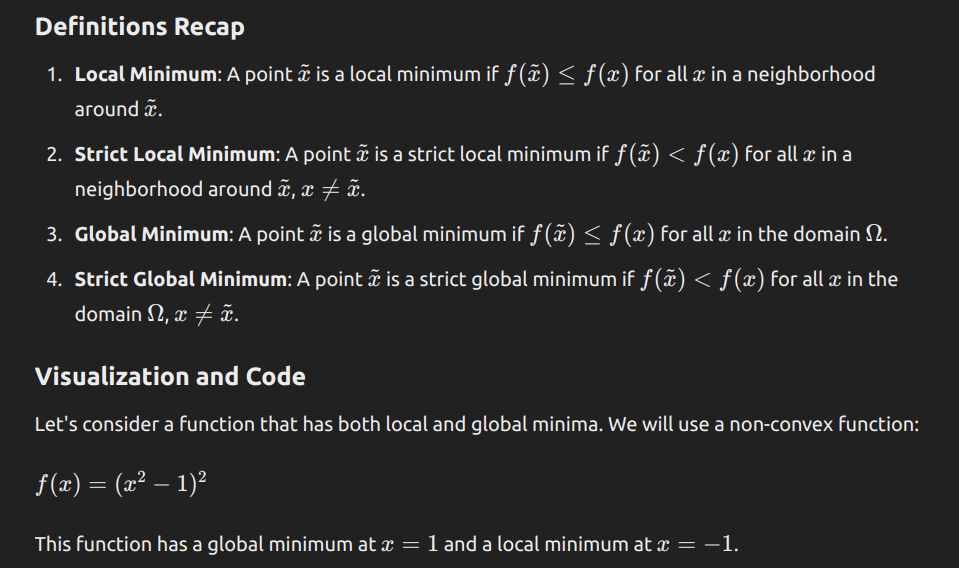



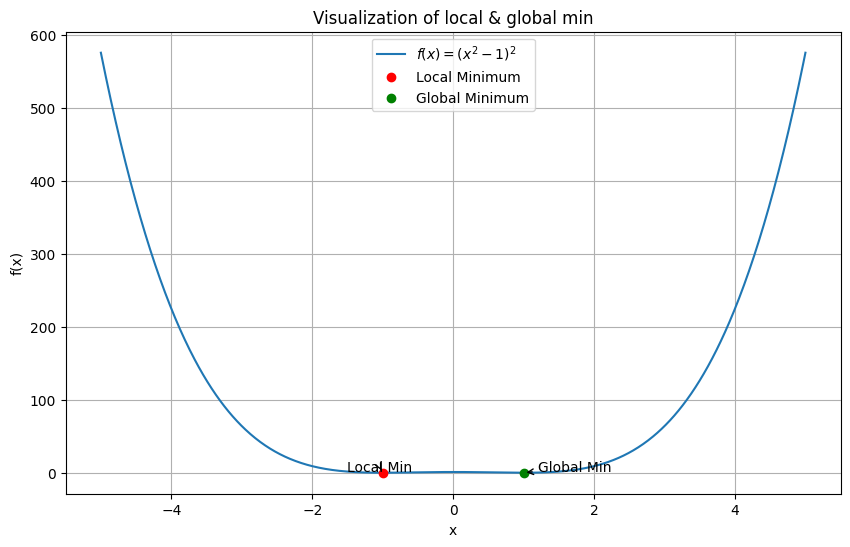

In [2]:
from scipy.optimize import minimize

# def a convex fn
def f(x):
    inside = x**2 - 1
    outside = inside**2
    return outside 

# create an array of x-vals
x = np.linspace(-5, 5, 1000)
y = f(x)

# plot the fn

plt.figure(figsize=(10,6))
plt.plot(x,y, label = r'$f(x) = (x^2 - 1)^2$')
plt.title("Visualization of local & global min")
plt.xlabel("x")
plt.ylabel("f(x)")

# Highlighting the local and global minima
local_min_x = -1
global_min_x = 1

plt.plot(local_min_x, f(local_min_x), 'ro', label='Local Minimum')
plt.plot(global_min_x, f(global_min_x), 'go', label='Global Minimum')

# Annotate the minima
plt.annotate('Local Min', xy=(-1, f(-1)), xytext=(-1.5, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.annotate('Global Min', xy=(1, f(1)), xytext=(1.2, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Perform minimization using different initial guesses
initial_guesses = [-1.5, 0.5]

for guess in initial_guesses:
    result = minimize(f, guess, method='BFGS')   # BFGS is a quasi-Newton method
    print(f"Initial guess: {guess}")
    print(f"Found minimum at x = {result.x[0]}")
    print(f"Function value at minimum: f(x) = {result.fun}")
    print("="*30)


Initial guess: -1.5
Found minimum at x = -0.9999999050175293
Function value at minimum: f(x) = 3.6086675518950436e-14
Initial guess: 0.5
Found minimum at x = 0.9999999394306042
Function value at minimum: f(x) = 1.4674605958274985e-14


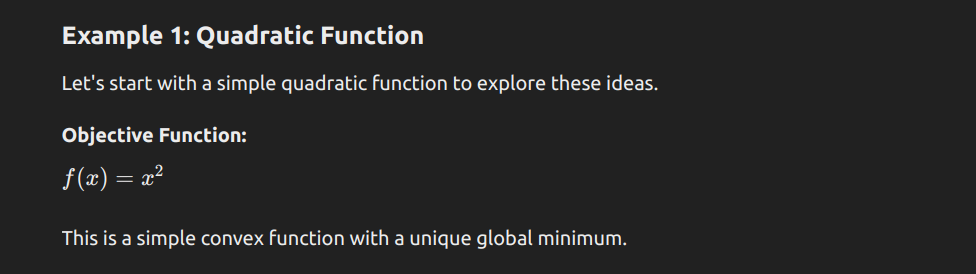

the min at x = 0, is both, local & global. To investigate this phenomenon, we, numerically analyze the behaviour of the function, around its min to determine its nature.
* 2nd Derivative Test
* Comparing fn values at both extrement as x is b/w -infinity -> +infinity

if 2nd Derivative is +ve, and fn value is at min is < any fn value for far x, then min is both local & global.

In [4]:
# Define the quadratic function
def objective_function(x):
    return x**2

# Initial guess
x0 = np.array([2.0])

# Perform the minimization
result = minimize(objective_function, x0, method='BFGS')


# 2nd Derivative
def second_der(f,x):
    epsilon = 1e-10
    change = (f(x+epsilon)-2*f(x)+ f(x-epsilon))/epsilon**2
    return change

# check the 2nd derivative at min
der = second_der(objective_function, result.x)




print("Optimal Solution: ", result.x, "Objective Fn value at optimal sol: ", result.fun)
print("2nd Derivative at min: ", der)
print("Far left value: ", objective_function(-100000))
print("Far right value: ", objective_function(100000))

# conclusion
if der > 0 and result.fun < min(objective_function(100000), objective_function(-100000)):
    print("The minimum at x = {} is both local and global.".format(result.x[0]))
else:
    print("The minimum at x = {} is local but not global.".format(result.x[0]))



Optimal Solution:  [-1.88846401e-08] Objective Fn value at optimal sol:  3.5662963072207506e-16
2nd Derivative at min:  [2.]
Far left value:  10000000000
Far right value:  10000000000
The minimum at x = -1.888464007393509e-08 is both local and global.


* The optimal solution is -1.88846401e-08, which is close enough to be considered zero.
* The objective function value is effectively zero.
* The second derivative confirms the convexity, indicating that this minimum is both a local and global minimum.

### Existance of a Solution
#### Weierstrass Theorem:
`Statement`: If ${f: D \subset \mathbb{R}^n \to \mathbb{R}}$ is continous & ${K \subset D}$ is Compact, then f attains its inf & sup on K. <br>
It suggest, an optimal solution can be found within region if f is continous and K is Compact. ${x_{min}}$ & ${x_{max}}$ in K s.t:
* ${f(x_{min})}$ is a global min of f in K
* ${f(x_{max})}$ is a global max of f in K 

This theorem guarantees the existance of a solution to an Optimization problem, under continuity and compactness conditions.

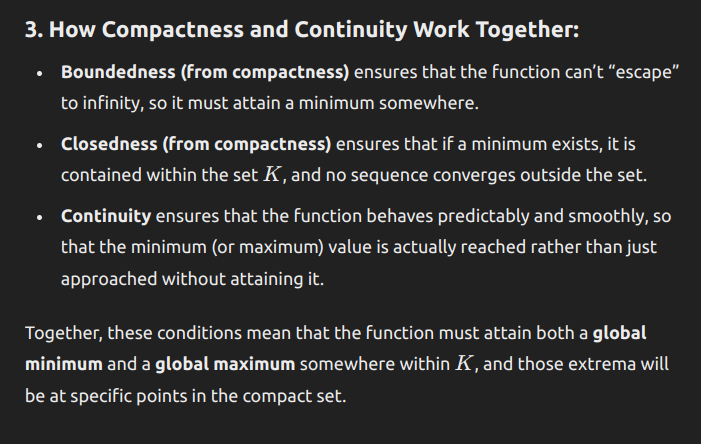

#### Theorem 1.3.2
We have ${D \subset \mathbb{R}^n}$, ${f: D \to \mathbb{R}}$ be a continous function & ${\Omega}$ is a closed set. <br>
Assumption: For atleast one ${w \in \Omega}$, the sub-level set $$ N(f, f(w)) = \{x \in D \mid f(x) \leq f(w)\}$$
is compact. <br>
Then f has atleast one global min in ${\Omega}$<br>
<br>
If f is continous, and atleast one sub-level set of f is compact, then there exists atleast 1 global min. This is the extension of Weirstrass Theorem to non-compact domains.

#### Corollary 1.3.1
We have ${D \subset \mathbb{R}^n}$, ${f: D \to \mathbb{R}}$ be a continous function & ${\Omega}$ is a closed set. <br>
If f is "coercive" (${lim_{\|x\| \to \infty} f(x) = \infty}$), then (P) has atleast one global solution . <br>

<br>
Coercivity ensures that the function grows large enough as ({\|x\| \to \infty}) ensuring function attains min somewhere within the domain.

### Convex Optimization Problem (P)
let ${f: D \to \mathbb{R}}$ continous function. Let D (D is not Empty set) ${D \subset \mathbb{R}^n}$ be an open set.<br>
let ${\Omega \subset D}$ is a Convex set. <br>
If function f is Convex on ${\Omega}$, then:$$min_{x \in \Omega} f(x)$$  (P)

is "Convex Optimization Problem"


#### Theorem 1.4.1
let (P) be Convex Optimization Problem, then in (P):
* Every local Solution is a global solution
* set of all solution is a Convex set.

#### Theorem 1.4.2
Let: 
* ${D \subset \mathbb{R}^n}$
* ${\Omega \subset D}$ is Convex (& ${\Omega \neq \emptyset}$) 
* ${f: D \to \mathbb{R}}$ is strictly convex (${f((1 - t)x + ty) < (1 - t)f(x) + tf(y) \quad \forall x, y \in \Omega, x \neq y \quad \forall t \in [0,1]}$) <br>

If (P) has a solution "a" (${a \in \Omega}$), then a is:
1. Uniquely determined (means global min is unique) &
2. strict global min of f in ${\Omega}$ 


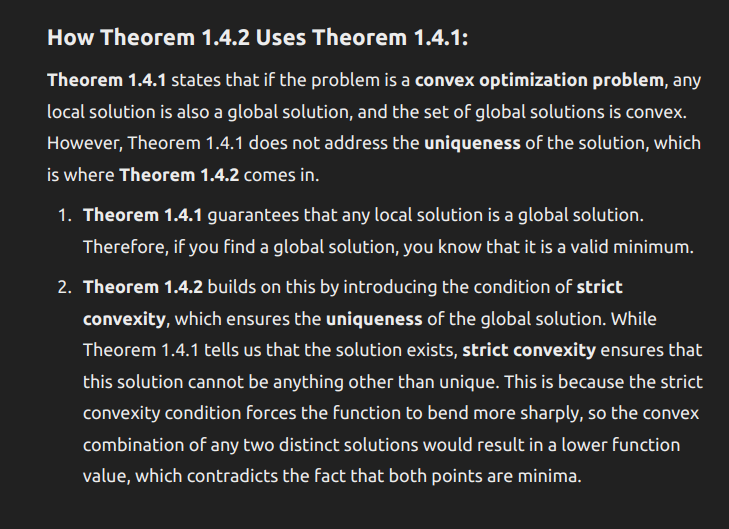
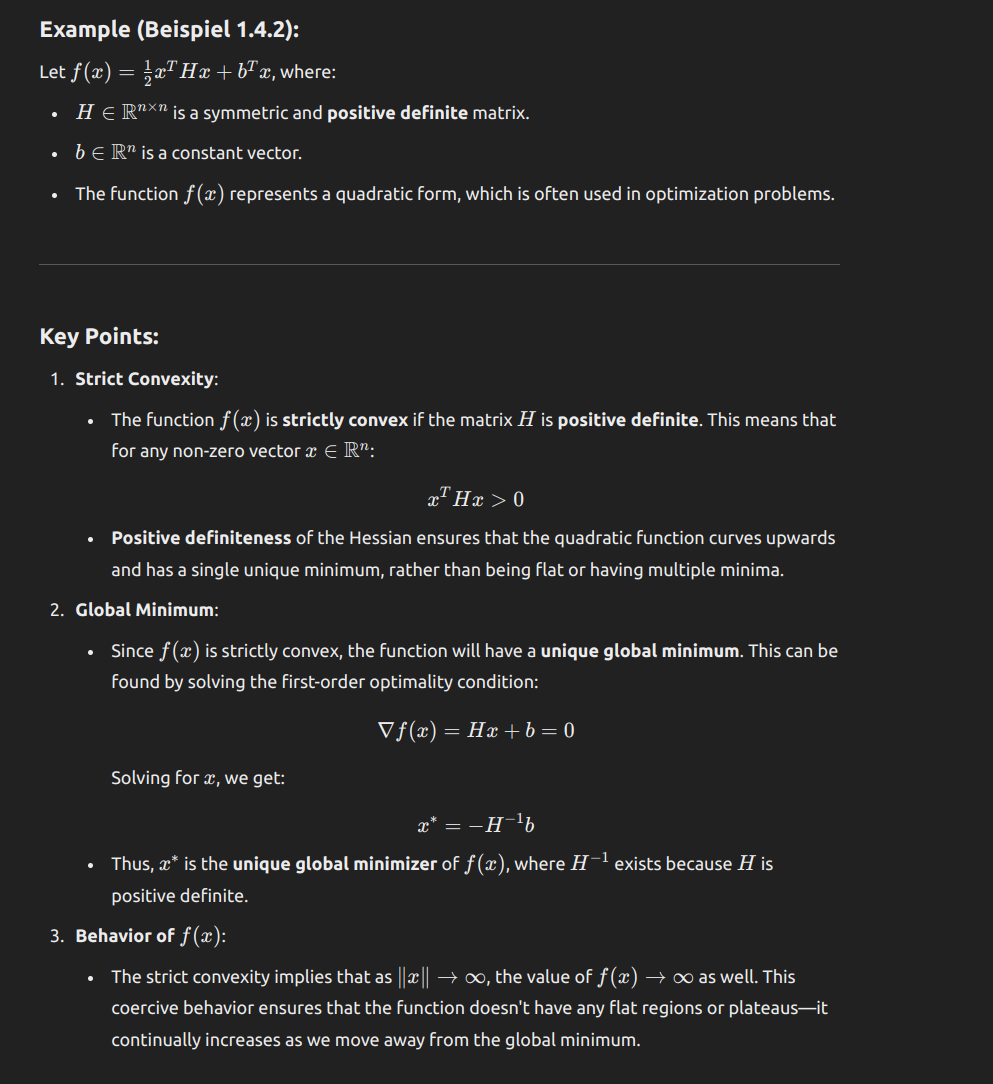

### Ex from Sheet 1
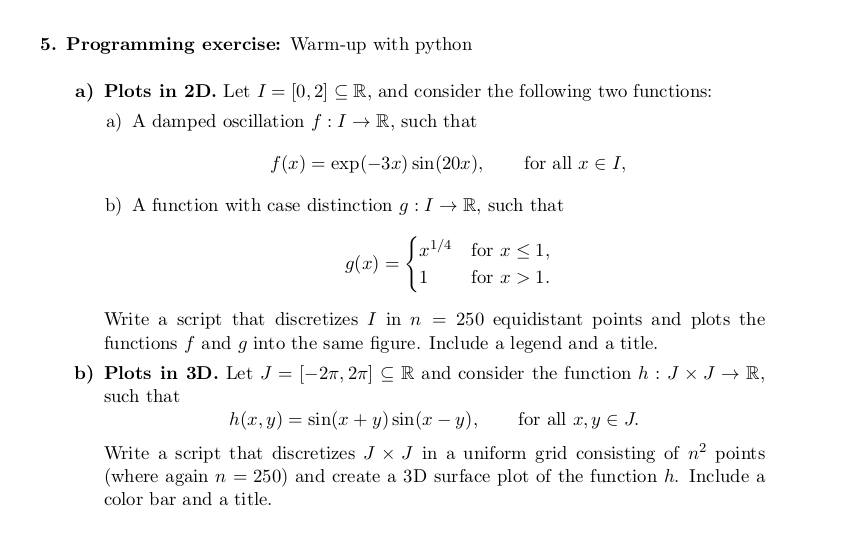

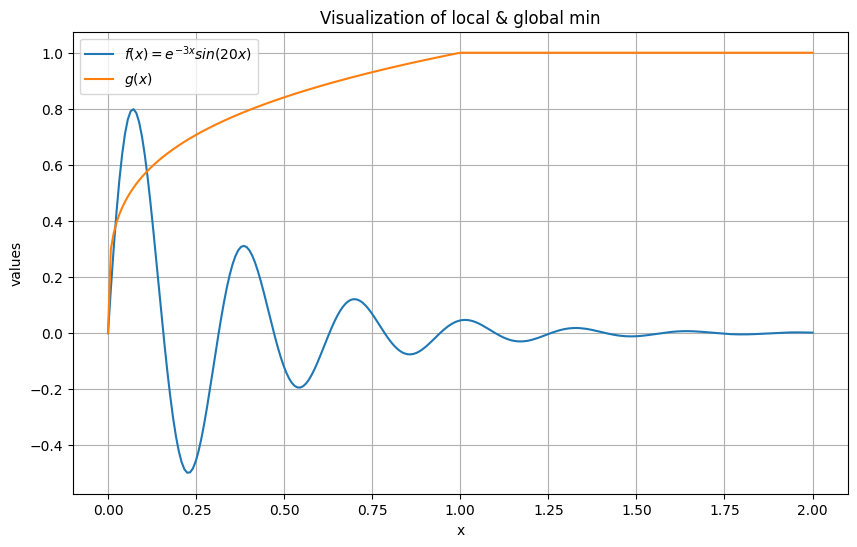

In [6]:
# define the function   (Plot in 2D)
def f(x):
    return (np.exp(-3*x))*(np.sin(20*x))

def g(x):
    # Use vectorization instead of looping
    return np.where(x <= 1, x**(1/4), 1)

# create I = [0,2]
n = 250
x = np.linspace(0,2,n)

# plot the function
plt.figure(figsize=(10,6))
plt.plot(x, f(x), label = r'$f(x) = e^{-3x}sin(20x)$')
plt.plot(x, g(x), label = r'$g(x)$')
plt.title("Visualization of local & global min")
plt.xlabel("x")
plt.ylabel("values")
plt.legend()
plt.grid(True)
plt.show()



<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2196/2952196989.py:27: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('3D Surface Plot of $h(x, y) = \sin(x + y) \sin(x - y)$')


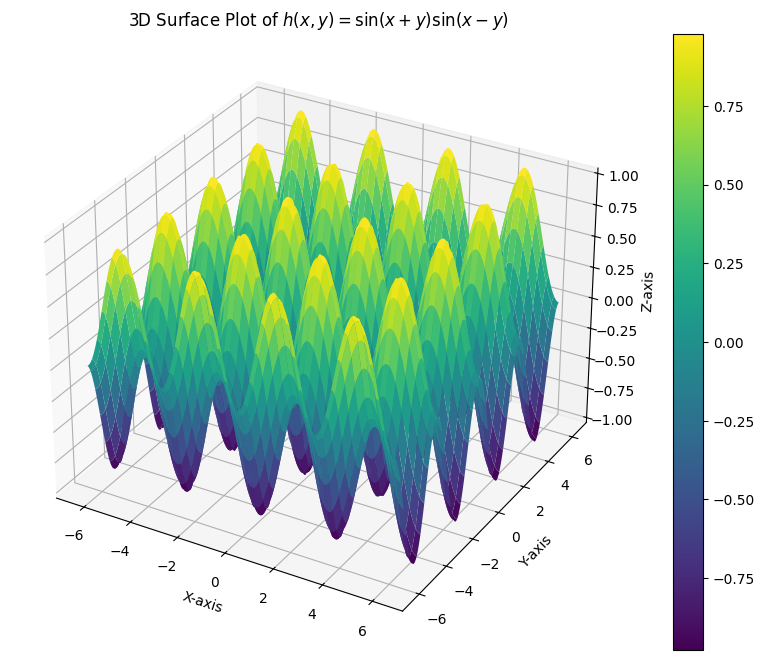

In [7]:
# plot in 3D
from mpl_toolkits.mplot3d import Axes3D

def h(x,y):
    return (np.sin(x+y))*(np.sin(x-y))

j = np.linspace(-2*np.pi, 2*np.pi, n)
X, Y = np.meshgrid(j,j)

# Compute h(X,Y) for the grid points
z = h(X,Y)

# Create a 3D plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')       # This is needed for 3D plotting

# Plot the surface
surface = ax.plot_surface(X, Y, z, cmap='viridis')

# Add a colorbar
fig.colorbar(surface)

# Labels & title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot of $h(x, y) = \sin(x + y) \sin(x - y)$')

plt.show()

                          